<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 >Week 25 Class 3 03/17</h1>
</div>

## Objectives for this week:
* Reviewing concepts we've covered

## Todays Agenda
* Machine Learning Review


### Imports

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Machine Learning Review Part 2</h1>
</div>

# Linear Regressions
1. **Import and analyze the data set.**
2. **Training our model**
3. **Analyze the results of our model** 
4. **Make predictions with our model.**

## Objective
The objective is to use linear regression to understand how years of experience impact Salary.

In [12]:
#Loading the salary dataset
data = pd.read_csv('../datasets/salary_data.csv')

In [13]:
#Let's have a look at what our data is like
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Plotting the Data

Let’s plot our data points on a 2-D graph to eyeball our dataset(get a rough overview) and see if we can manually find any relationship between the data.

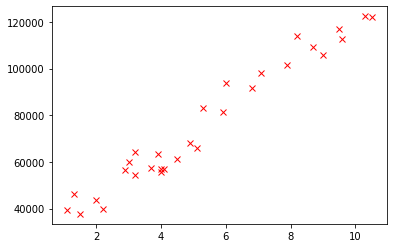

In [14]:
# Scatter plot helps in visualising the data distribution
plt.plot(data["YearsExperience"], data["Salary"], 'rx')

As you can see, there is a clear relationship between the years of experience and salary.

# Setting variables
Our next step is to divide the data into “attributes” and “labels” or as you've already known as input and target variables.

In our dataset, we only have two columns. We want to predict the Salary depending upon the Years of Experience recorded. Therefore our attribute set will consist of the “YearsExperience” column which is stored in the X variable, and the label will be the “Salary” column which is stored in y variable.

In [15]:
X = data[['YearsExperience']]
y = data['Salary']

In [16]:
np.array([1,2,3,4]).shape

(4,)

If you are wondering why a capital X is used for features, and lowercase y for labels, it is mainly due to convention.

# Splitting the data

Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
The test_size variable is where we actually specify the proportion of the test set.

By passing our X and y variables into the train_test_split method, we are able to capture the splits in data by assigning 4 variables to the result.

In [17]:
# import SK Learn train test split
from sklearn.model_selection import train_test_split 

# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=47)

# Training our model

After splitting the data into training and testing sets, finally, the time is to train our algorithm. Firstly, importing of sklearn.linear_model is required for us to access LinearRegression. It then needs to be instantiated and model fit to our training data. This is seen below.

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression()  # create object for the class

#fit model to our training data i.e learn coefficients
reg.fit(X_train, y_train) 

LinearRegression()

# Interpreting Coefficients
The coefficients(b0 and b1) will allow us to model our equation with values and find the best fit line. The linear_regressor variable (assigned to a LinearRegression object), is able to have the intercept and coefficients extracted, using the code below.

We can get the coefficients for our equation using `reg`

$$y = \beta_0+ \beta_1 x $$

$\beta_0$ is

In [20]:
# prints y-intercept
print(reg.intercept_)

31679.13548416261


$\beta_1$ is

In [21]:
# prints the coefficient
print(reg.coef_)

[8905.39932491]


The intercept will be your b0 value; and coefficient will be b1.

So our equation is:

$$y = 31679.14 + 8905.40 x $$

# Making predictions based on your model
Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the salaries. 

Making predictions based on your model is as simple as using the code below: passing the predict method your test data. This will return predicted values of y given the new test X data.

In [43]:
y_pred = reg.predict(X_test)  # make predictions

In [46]:
X_test

,YearsExperience
15,4.9
3,2.0
28,10.3
10,3.9
24,8.7
12,4.0
0,1.1
5,2.9
22,7.9


In [45]:
y_pred

array([ 72236.60999379,  44747.24412545, 123423.70505898,  62757.51831505,
       108257.158373  ,  63705.42748293,  36216.06161458,  53278.42663631,
       100673.88503001])

We have our predictions in y_pred. Now lets visualize the data set and the regression line with the test data:

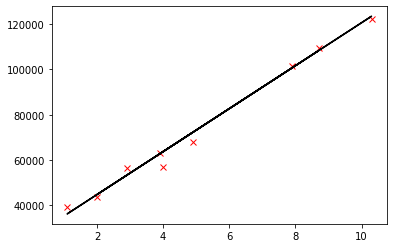

In [47]:
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, color='black')
plt.show()

As you can see, the algorithm has drawn a line that passes through the maximum test data points and has the minimum distance from the others. This line is known as the "best-fit" or the regression line. 

Since this line has a positive slope, we can say that the salary increases as no. of years of experience increase.

# Model Evaluation

Some things to note:
* our `score`
* our `fit`
* our chart

First let's discuss the `fit` method. What does it do?

`sklearn.linear_model.LinearRegression` actually uses Ordinary Least Squares which is solvable using linear algebra. So the gif isn't true. But in theory it is. The machine learning way to fit a linear regression curve uses gradient descent.

https://miro.medium.com/max/700/1*CjTBNFUEI_IokEOXJ00zKw.gif

Something called [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent)

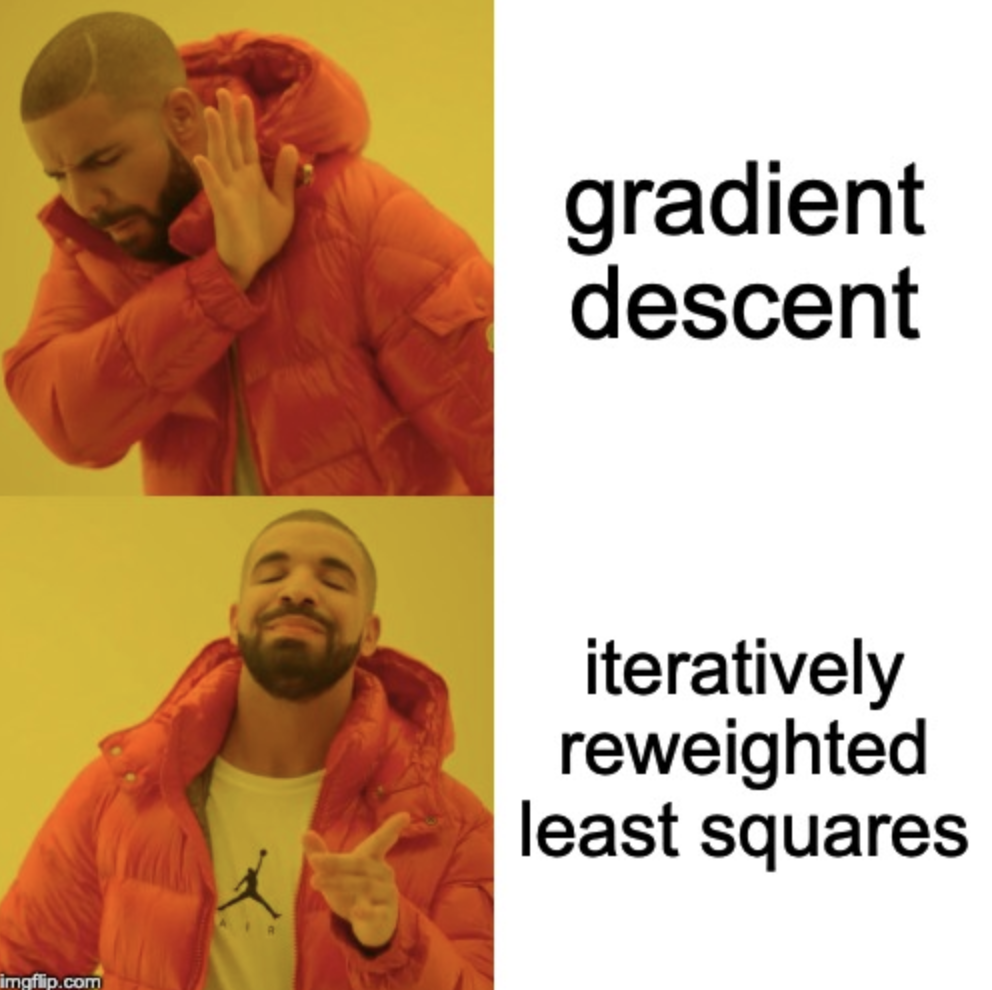

What does the `score` mean?

The score is the $R^{2}$ or the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)
It's essentially the proportion of the variance in the dependent variable that is predictable from the independent variables. Meaning it's giving us information about the "goodness of fit". A $R^{2}$ ranges between 0 and 1. 1 implies the dependent variable is perfectly predictable from the independent variable. 0 implies that the dependent variables are not predictable from the independent variables. We ideally want a model with an $R^{2}$ to be closer to 1. However, there are instances of trading firms making millions off of a $R^{2}$ of 0.07. Ultimately it isn't a definitive "grade"/"score" for our line of best fit and we can still gain insights from a linear regression with a low $R^2$

 $R^{2}$ is calculated as follows:
$$ 1 - \frac{SS_{res}}{SS_{tot}}$$
where the total sum of squares is calculated as such
$$ SS_{tot} = \sum\limits_{i}(y_i - \bar{y})^2$$
and the residual sum of squares is calculated as such
$$ SS_{res} = \sum\limits_{i}(y_i - f_i)^2$$
reminder: we don't need to calculate this since sklearn does it for us

### What about our chart?

Our chart indicates that our linear regression seems to accurately describe the relationship between years of experience and salary. The slope of our line is positive which means that as years of experience increases, so will salary. The line looks well fitted so we expect that the $r^{2}$ will be high.

### Error Calculations

Technically the formula for a linear regression is:

$$ \hat{y} = \beta_O + \beta_1x + \epsilon$$

We haven't considered adding in an error value.

First a definition:

**Residual** - *a residual is the vertical distance between a data point and the regression line.*

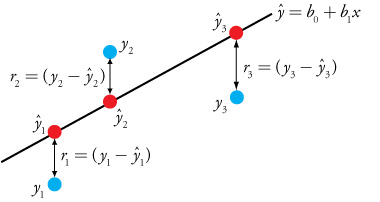

There are many ways to calculate errors for a linear regression. They are all similar in nature. We calculate our errors based on how much the actual values deviate from the predicted values (which essentially are the residuals). The following formulas are variations of this.
* Mean Absolute Error
* Mean Square Error
* Mean Absolute Percentage Error
* Mean Percentage Error

### Mean absolute error
The mean absolute error (MAE) is the simplest regression error metric to understand. We’ll calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. We then take the average of all these residuals. Effectively, MAE describes the typical magnitude of the residuals. 

$$ MAE = \frac{1}{n}\sum|y-\hat{y}|$$

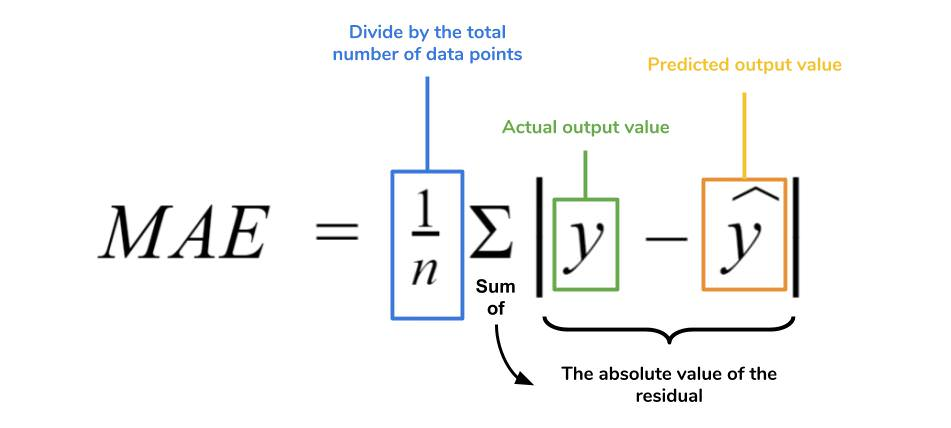

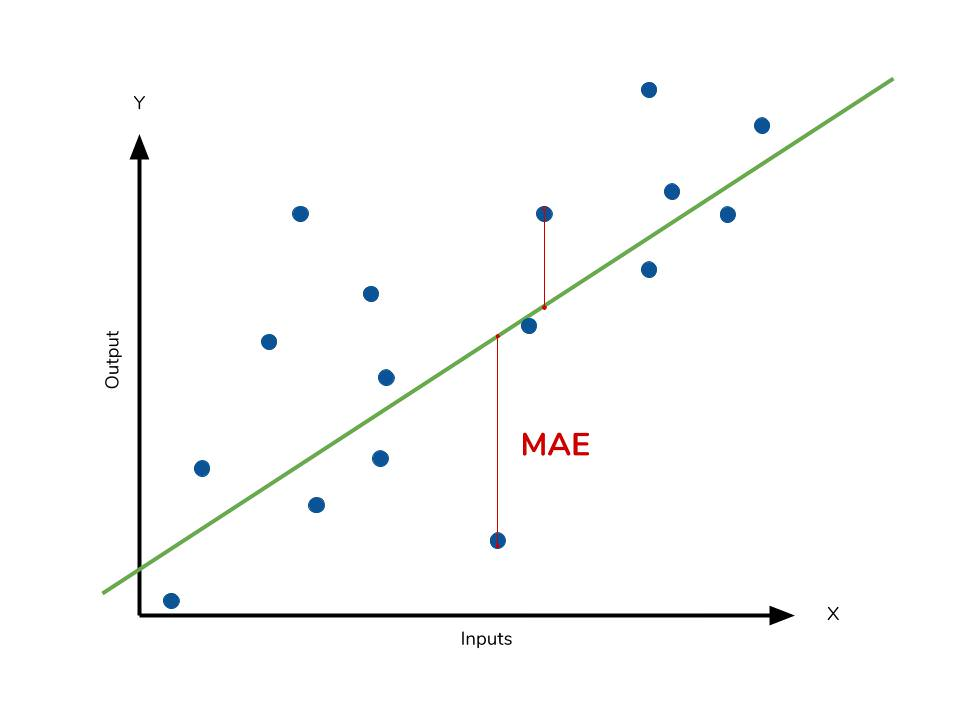

### Mean Square Error

The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. We can see this difference in the equation below. 

$$ MSE = \frac{1}{n}\sum(y-\hat{y})^2 $$

Because we are squaring the difference, the MSE will almost always be bigger than the MAE. For this reason, we cannot directly compare the MAE to the MSE. We can only compare our model’s error metrics to those of a competing model. The effect of the square term in the MSE equation is most apparent with the presence of outliers in our data. While each residual in MAE contributes proportionally to the total error, the error grows quadratically in MSE. This ultimately means that outliers in our data will contribute to much higher total error in the MSE than they would the MAE. Similarly, our model will be penalized more for making predictions that differ greatly from the corresponding actual value. This is to say that large differences between actual and predicted are punished more in MSE than in MAE. The following picture graphically demonstrates what an individual residual in the MSE might look like. 

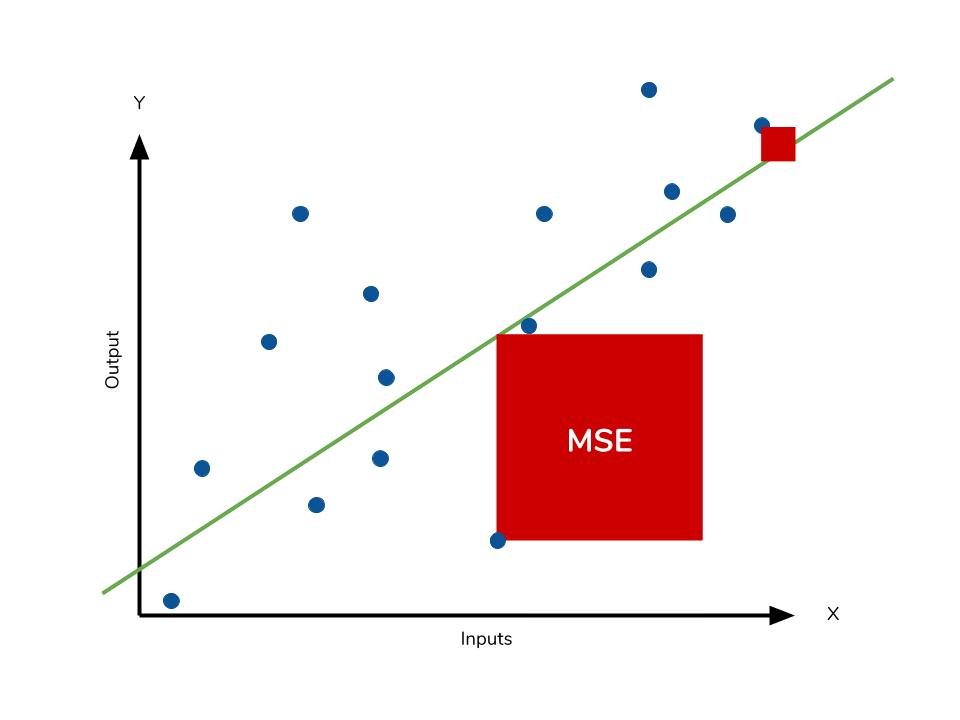

### Mean Absolute Percentage Error

The mean absolute percentage error (MAPE) is the percentage equivalent of MAE. The equation looks just like that of MAE, but with adjustments to convert everything into percentages. The usefulness of this is that the error is in terms of percentage which makes it easier to understand conceptually. However the presence of a division means for very small values of $y$, the MAPE can be extremely large and the MAPE **CANNOT** be calculated if $y=0$

$$ MAPE = \frac{100\%}{n}\sum|\frac{y-\hat{y}}{y}| $$

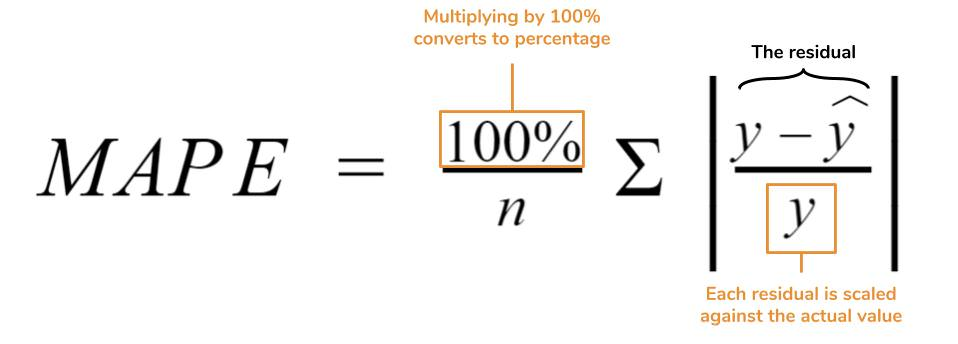

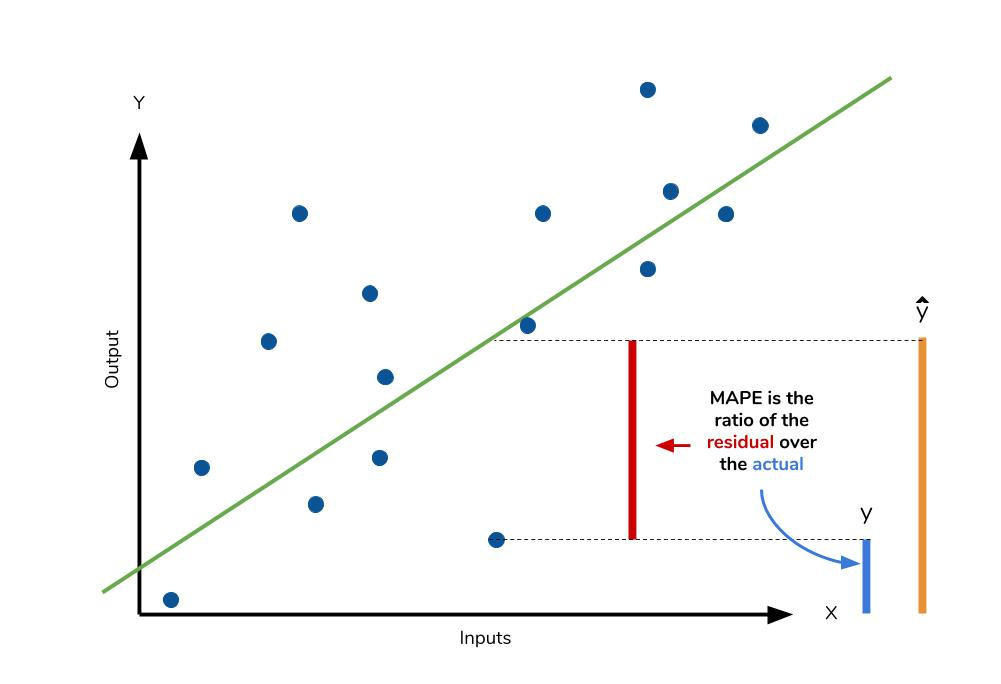

### Mean Percentage Error

The mean percentage error (MPE) equation is exactly like that of MAPE. The only difference is that it lacks the absolute value operation.

$$ MPE = \frac{100\%}{n}\sum(\frac{y-\hat{y}}{y}) $$

The lack of absolute values means that positive and negative residuals will cancel out. This prevents us from analyzing how well the model predicts. It will however allow us to tell whether or not there are more positive errors or negative errors which will tell us if our model overestimates (positve error) or underestimates (negative error).

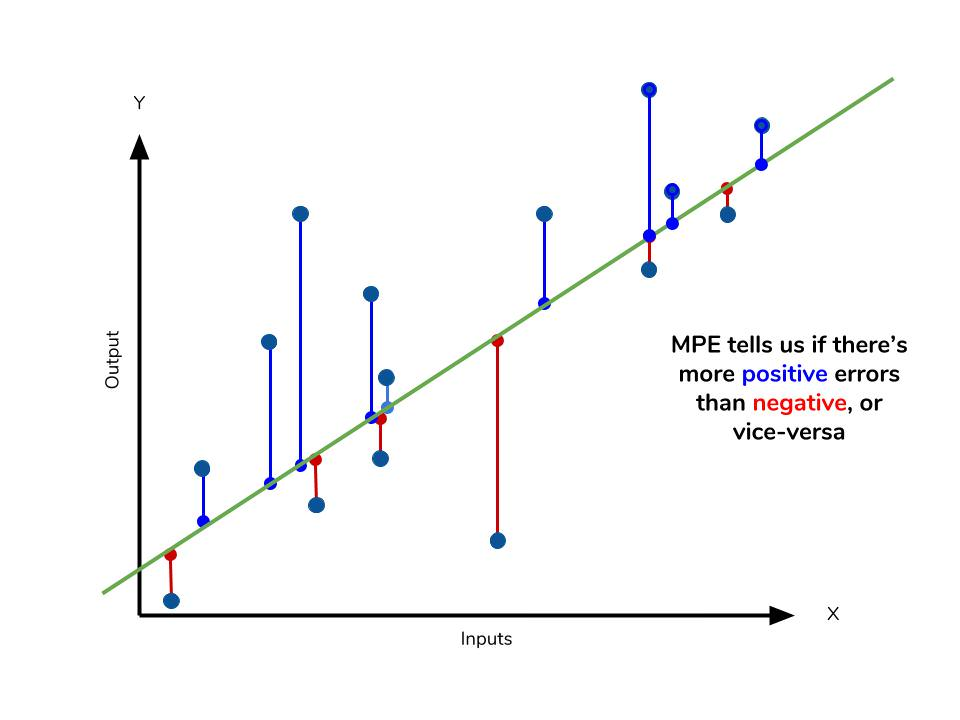

<table>
<thead>
<tr>
<th>
Acroynm</th>
<th>
Full Name</th>
<th>
Residual Operation?</th>
<th>
Robust To Outliers?</th>
</tr>
</thead>
<tbody>
<tr>
<td>
MAE</td>
<td>
Mean Absolute Error</td>
<td>
Absolute Value</td>
<td>
Yes</td>
</tr>
<tr>
<td>
MSE</td>
<td>
Mean Squared Error</td>
<td>
Square</td>
<td>
No</td>
</tr>
<tr>
<td>
MAPE</td>
<td>
Mean Absolute Percentage Error</td>
<td>
Absolute Value</td>
<td>
Yes</td>
</tr>
<tr>
<td>
MPE</td>
<td>
Mean Percentage Error</td>
<td>
N/A</td>
<td>
Yes</td>
</tr>
</tbody>
</table>


The above was adapted from the following link.
More on this here: [understanding regression error metrics](https://www.dataquest.io/blog/understanding-regression-error-metrics/)

Let's see some metrics:

$R^{2}$, Mean absolute error (MAE), Mean squared error (MSE), Root mean squared error (MSE but the square root).

In [49]:
# import metrics library
from sklearn import metrics

#print result of RMSE
print(f"R^2: {metrics.r2_score(y_test, y_pred)}")
print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

R^2: 0.9875719650500361
MSE: 9961725.24601648
MAE: 2450.548521354498
RMSE: 3156.2200883361224


   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


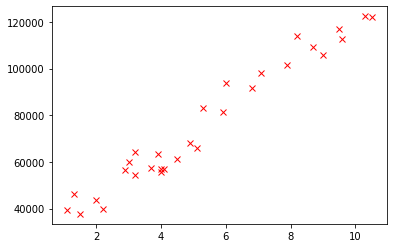

intercept: 25789.060767971707
coefficient: 9479.091678738736


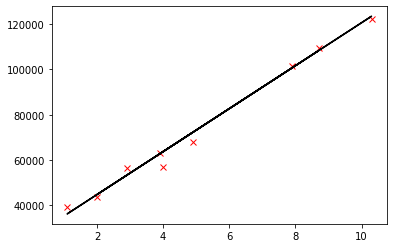

R^2: 0.9875719650500361
MSE: 9961725.24601648
MAE: 2450.548521354498
RMSE: 3156.2200883361224


In [24]:
# All in one
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics

#Loading the salary dataset
data = pd.read_csv('../datasets/salary_data.csv')
print(data.head())
# Scatter plot helps in visualising the data distribution
plt.plot(data["YearsExperience"], data["Salary"], 'rx')
plt.show()

# Setting our X and y variables
X = data[['YearsExperience']]
y = data['Salary']

# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

# create object for the class
reg = LinearRegression()  

#fit model to our training data i.e learn coefficients
reg.fit(X_train, y_train) 

# printing beta_0 and beta_1
print(f"intercept: {reg.intercept_}")
print(f"coefficient: {reg.coef_[0]}")

# getting predicted y values
y_pred = reg.predict(X_test)  # make predictions

# plotting our fitted line
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, color='black')
plt.show()

#print results of error calculations
print(f"R^2: {metrics.r2_score(y_test, y_pred)}")
print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

# Cross Validation

Cross-validation, sometimes called rotation estimation or out-of-sample testing, is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set.

[Cross Validation Wikipedia](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#Motivation)

### What is Cross-Validation?

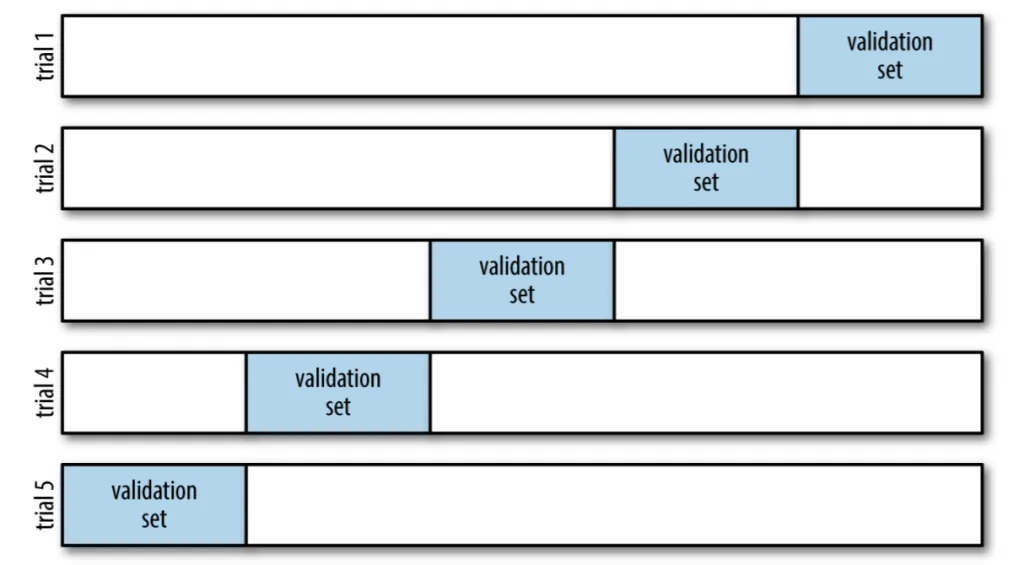

In cross-validation, the data is instead split multiple times and multiple models are trained. The most commonly used version of cross-validation is k-times cross-validation, where k is a user-specified number, usually 5 or 10.

### Benefits & Drawbacks of Using Cross-Validation

There are several advantages to using cross-validation instead of a single division into one training and one set of tests. First of all, remember that train_test_split performs a random division of data.

Imagine that we are “lucky” at randomly splitting the data, and all the hard-to-categorize examples end up in the training set. In this case, the test set will only contain “simple” examples, and the accuracy of our test set will be unrealistic.

Conversely, if we are “unlucky” we may have randomly placed all of the hard-to-rank examples in the test set and therefore have an unrealistic score.

However, when using cross-validation, each example will be in the test set exactly once: each example is in one of the folds, and each fold is the test set once. Therefore, the model must generalize well to all samples in the dataset for all cross-validation scores (and their mean) to be high.

Having multiple splits of the data also provides information about the sensitivity of our model to the selection of the training data set. For the iris dataset, we saw accuracies between 90% and 100%. That’s quite a range, and it gives us an idea of ​​how the model might work in the worst-case scenario and the best-case scenario when applied to new data.

Another advantage of cross-validation over using a single data division is that we use our data more efficiently. When using train_test_split, we typically use 75% of the data for training and 25% of the data for evaluation.

When using five-fold cross-validation, on each iteration we can use four-fifths of the data (80%) to fit the model. When using 10 cross-validations, we can use the nine-tenths of the data (90%) to fit the model. More data will generally result in more accurate models.

[source](https://thecleverprogrammer.com/2020/10/25/what-is-cross-validation-in-machine-learning/)

[Blog post about using cross validation for a linear regression in python](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) (note: doing cross validation in python is out of scope for the assessment)

# Exponential functions and logarithms

In [1]:
import math
import numpy as np

## Exponential functions

What is **e**? It is simply a number (known as Euler's number):

In [2]:
math.e

2.718281828459045

**e** is a significant number, because it is the base rate of growth shared by all continually growing processes.

For example, if I have **10 dollars**, and it grows 100% in 1 year (compounding continuously), I end up with $10e^{1}$ dollars:

In [3]:
# 100% growth for 1 year
10 * np.exp(1)

27.18281828459045

In [4]:
# 100% growth for 2 years
10 * np.exp(2)

73.890560989306508

Side note: When e is raised to a power, it is known as **the exponential function**. Technically, any number can be the base, and it would still be known as **an exponential function** (such as 2^5). But in our context, the base of the exponential function is assumed to be e.

Anyway, what if I only have 20% growth instead of 100% growth?

In [5]:
# 20% growth for 1 year
10 * np.exp(0.20)

12.214027581601698

In [6]:
# 20% growth for 2 years
10 * np.exp(0.20 * 2)

14.918246976412703

## Logarithms

What is the **(natural) logarithm**? It gives you the time needed to reach a certain level of growth. For example, if I want growth by a factor of 2.718, it will take me 1 unit of time (assuming a 100% growth rate):

In [7]:
# time needed to grow 1 unit to 2.718 units
np.log(2.718)

0.99989631572895199

If I want growth by a factor of 7.389, it will take me 2 units of time:

In [8]:
# time needed to grow 1 unit to 7.389 units
np.log(7.389)

1.9999924078065106

If I want growth by a factor of 1, it will take me 0 units of time:

In [9]:
# time needed to grow 1 unit to 1 unit
np.log(1)

0.0

If I want growth by a factor of 0.5, it will take me -0.693 units of time (which is like looking back in time):

In [10]:
# time needed to grow 1 unit to 0.5 units
np.log(0.5)

-0.69314718055994529

## Connecting the concepts

As you can see, the exponential function and the natural logarithm are **inverses** of one another:

In [11]:
np.log(np.exp(5))

5.0

In [12]:
np.exp(np.log(5))

4.9999999999999991

# Conditional Probabilities

$$P(A \cup B) = P(A) + P(B) - P(A \cap B)$$

$$ P(A|B) = \frac{P(A \cap B)}{P(B)} $$

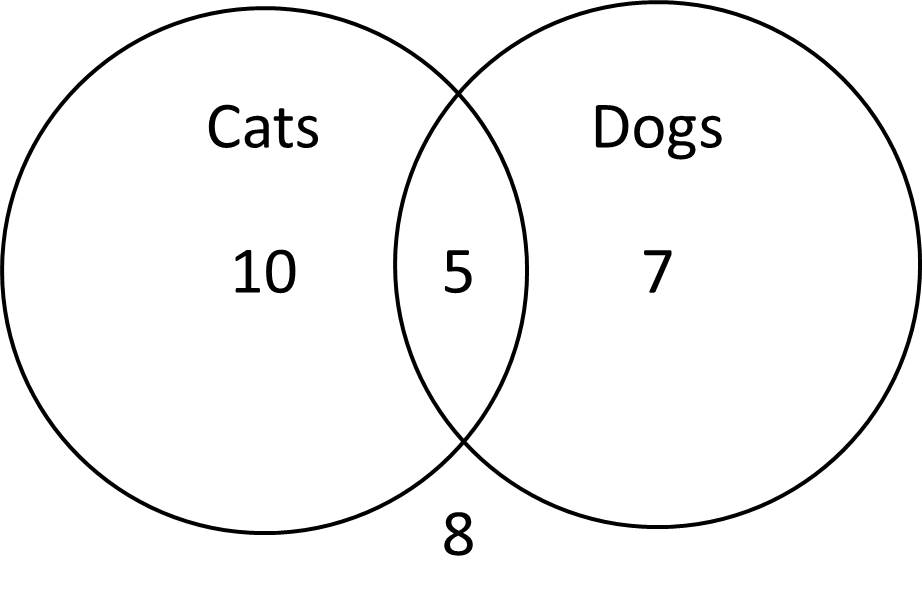

$$ \textbf{Total number of students} = 8 + 5 + 10 + 7 = 30 $$

$$ P(A) = \frac{10+5}{30} = 0.5$$

$$ P(B) = \frac{7+5}{30} = 0.4$$

$$ P(A \cup B) = P(A) + P(B) - P(A \cap B) = \frac{15}{30} + \frac{12}{30} - \frac{5}{30}$$ 
$$ P(A \cup B) = \frac{22}{30} = 0.73333... $$

$$ P((A \cup B)^{c}) = \frac{8}{30} = 0.26666... $$

Note: $ P((A \cup B)^{c}) = 1 - P(A \cup B) $


$$ P(A \cap B) = \frac{5}{30} = 0.16666... $$ 

$$ P(A|B) = \frac{P(A \cap B)}{P(B)} $$
$$ P(A|B) = \frac{0.1666...}{0.4} =  0.41666...$$

Notice something? 

$$ P(A|B) = \frac{5}{12} = 0.41666...$$

# Logistic Regression

Also known as log odds and logit, logistic regression is very similar to the linear regressions we've done. However the goal of logistic regression is to model the probability that data is part of a default class. In this sense it's able to perform binary classification.

**Wait, regression for classification???**

Is it possible to use regression to get a value between 0 and 1 and simply round to get a binary value?

**NO.** The reason for this is, that the values we get do not necessarily lie between 0 and 1, so how should we deal with a -42 as our response value?

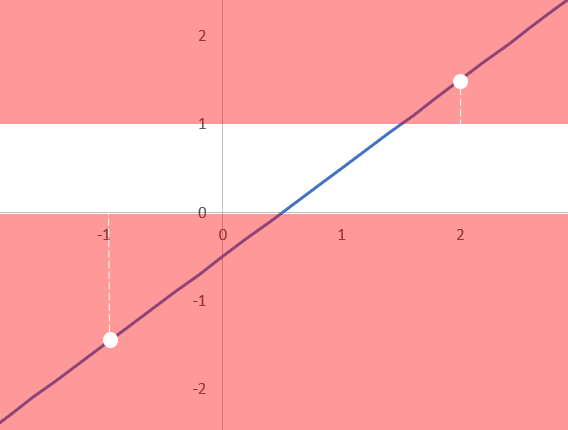

As you can see in the above illustration, an arbitrary selected value x={-1, 2} will be placed on the line somewhere in the red zone and therefore, not allow us to derive a response value that is either (at least) between or at best exactly 0 or 1. We need a function that looks like the following:

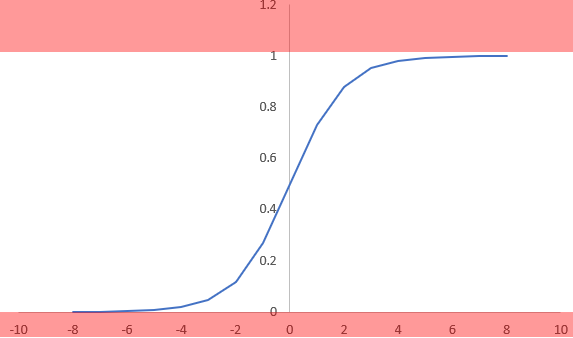

The huge advantage is that even an infinitely small number is mapped to “close to” zero and will not be somewhere beyond our boundary. 

So how do we get there from linear regression?

### How Logistic Regression works

For example, if we are modeling people’s sex as male or female from their height, then the first class could be female and the logistic regression model could be written as the probability of a person being female given a person’s height, or more formally:

$$ P(sex=female|height)$$

Written another way, we are modeling the probability that an input ($X$) belongs to the default class ($Y=1$), we can write this formally as:

$$ P(X) = P(Y=1|X)$$

We’re predicting probabilities? I thought logistic regression was a classification algorithm?

Logistic regression is a linear method, but the predictions are transformed using the logistic function. The impact of this is that we can no longer understand the predictions as a linear combination of the inputs as we can with linear regression, for example, continuing on from above, the model can be stated as:

$$ p(X) = \frac{e^{\beta_0 + \beta_1*X}}{(1 + e^{\beta_0 + \beta_1*X})} $$

I don’t want to dive into the math too much, but we can turn around the above equation as follows (we can remove the e from one side by adding a natural logarithm (ln) to the other):

$$ ln(\frac{p(X)}{1 – p(X)}) = b0 + b1 X $$

This is useful because we can see that the calculation of the output on the right is linear again (just like linear regression), and the input on the left is a log of the probability of the default class.

This ratio on the left is called the odds of the default class (it’s historical that we use odds, for example, odds are used in horse racing rather than probabilities). Odds are calculated as a ratio of the probability of the event divided by the probability of not the event, e.g. 0.8/(1-0.8) which has the odds of 4. So we could instead write:

$$ ln(odds) = b0 + b1 * X $$

Because the odds are log transformed, we call this left hand side the log-odds or the probit. 

The logit function, also known as the log odds function, is as follows:

$$ logit(p) = log(\frac{p}{1-p}) $$

If $p$ is a probability, then $\frac{p}{1-p}$ is the corresponding odds. So the logit of the probability is the logarithm of the odds.

The logistic function of any number $ \alpha $ is given by the inverse-logit:
$$ logit^{-1}(\alpha) = logistic(\alpha) =  \frac{1}{1 + e^{-\alpha}}$$

The above function is otherwise known in machine learning as the sigmoid function:

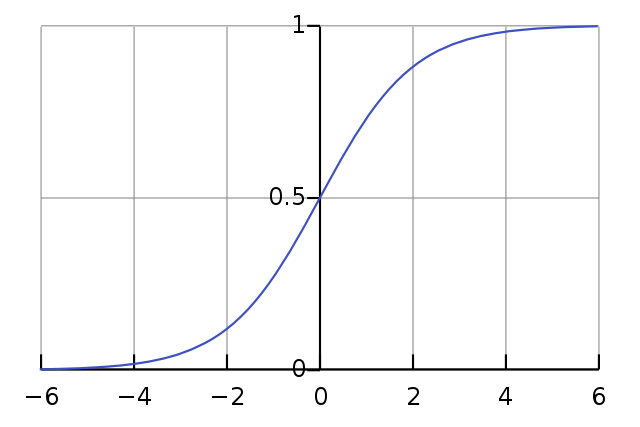

So logistic regression allows us to use a process similar to linear regression but with a slight change that maps our results to a binary outcome (by using the sigmoid function above).

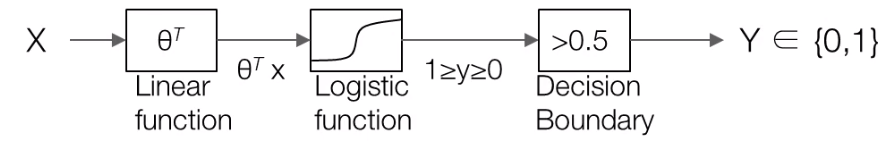

Assumptions we have to make to do a logistic regression:
* The response variable is binary
* The observations are independent
* There is no multicollinearity among the explanatory variables
* There are no extreme outliers
* There is a linear relationship between the explanatory variables and the logit of the response variable
* The sample size is sufficiently large

### Resources:
https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf
https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc
https://realpython.com/logistic-regression-python/

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

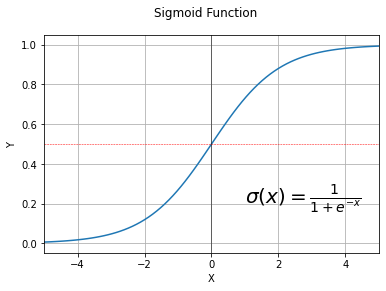

In [66]:
def sigmoid(a):
    return 1/(1+np.exp(-a))

x = np.linspace(-6,6,100)
y = sigmoid(x)
z = 1
plt.plot(x,y)
plt.axvline(x=0,ymin=0, ymax=1, c='black', lw=0.5)
plt.axhline(y=0.5,xmin=-5, xmax=5, c='r', lw=0.5, ls='--')
plt.grid(10)
plt.suptitle("Sigmoid Function")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(-5,5)
plt.text(1,0.2,r'$\sigma(x)=\frac{1}{1+e^{-x}}$',fontsize=20)
plt.show()

In [67]:
df = pd.read_csv("../datasets/heightsandweights.csv")

In [68]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [70]:
df.rename(columns={'Gender':'Sex'}, inplace=True)

In [71]:
df.drop("Index", axis=1, inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sex     500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 11.8+ KB


<AxesSubplot:>

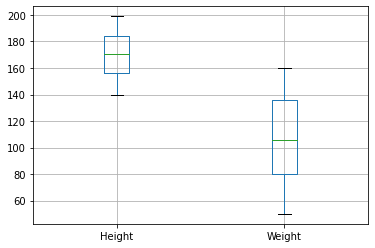

In [73]:
df.boxplot()

In [74]:
def convert_cm_to_inches(cm):
    return cm * 0.3937008

def convert_kg_to_lbs(kg):
    return kg * 2.204623

def convert_sex_to_binary(sex):
    return 1 if sex=='Female' else 0

In [75]:
df['Height (inches)'] = df['Height'].apply(convert_cm_to_inches)
df['Weight (lbs)'] = df['Weight'].apply(convert_kg_to_lbs)
df['Sex'] = df['Sex'].apply(convert_sex_to_binary)

In [76]:
df.head()

,Sex,Height,Weight,Height (inches),Weight (lbs)
0,0,174,96,68.503939,211.643808
1,0,189,87,74.409451,191.802201
2,1,185,110,72.834648,242.508530
3,1,195,104,76.771656,229.280792
4,0,149,61,58.661419,134.482003


<AxesSubplot:>

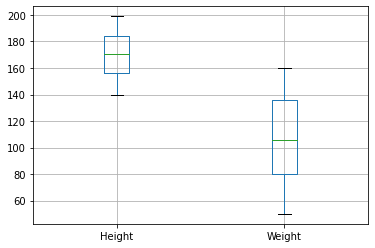

In [77]:
df[['Height', 'Weight']].boxplot()

Text(0, 0.5, 'Weight')

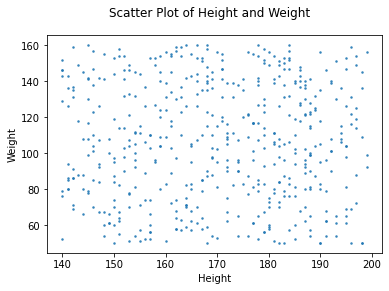

In [78]:
plt.scatter(x='Height', y='Weight', data=df, s=2.5, alpha=0.75)
plt.suptitle("Scatter Plot of Height and Weight")
plt.xlabel("Height")
plt.ylabel("Weight")

Text(0, 0.5, 'Sex')

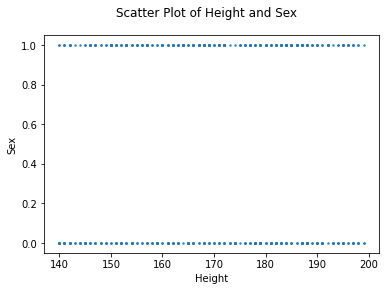

In [79]:
plt.scatter(x='Height', y='Sex', data=df, s=2.5, alpha=0.75)
plt.suptitle("Scatter Plot of Height and Sex")
plt.xlabel("Height")
plt.ylabel("Sex")

Text(0, 0.5, 'Sex')

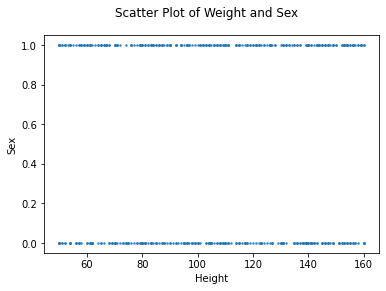

In [80]:
plt.scatter(x='Weight', y='Sex', data=df, s=2.5, alpha=0.75)
plt.suptitle("Scatter Plot of Weight and Sex")
plt.xlabel("Height")
plt.ylabel("Sex")

In [81]:
X = df[['Height','Weight']]
       
Y = df['Sex']

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)

In [83]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [84]:
logreg.fit(X_train, Y_train)

LogisticRegression()

In [85]:
y_pred = logreg.predict(X_test)

In [86]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

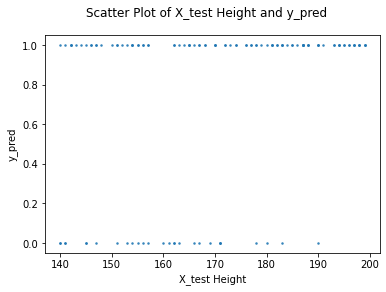

In [87]:
plt.scatter(X_test['Height'], y_pred, s=2.5, alpha=0.75)
plt.suptitle("Scatter Plot of X_test Height and y_pred")
plt.xlabel("X_test Height")
plt.ylabel("y_pred")
plt.show()

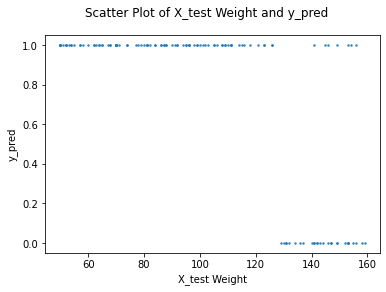

In [88]:
plt.scatter(X_test['Weight'], y_pred, s=2.5, alpha=0.75)
plt.suptitle("Scatter Plot of X_test Weight and y_pred")
plt.xlabel("X_test Weight")
plt.ylabel("y_pred")
plt.show()

# Confusion Matrices

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.


<table>
<tbody><tr>
<th style="background:linear-gradient(to top right,#eaecf0 49.5%,#aaa 49.5%,#aaa 50.5%,#eaecf0 50.5%);line-height:1;"><div style="margin-left:2em;text-align:right;">&nbsp; Predicted</div><div style="margin-right:2em;text-align:left;">Actual class</div>
</th>
<th><abbr title="Positive">P</abbr>
</th>
<th><abbr title="Negative">N</abbr>
</th></tr>
<tr>
<th><abbr title="Positive">P</abbr>
</th>
<td><b><abbr title="True positive">TP</abbr></b>
</td>
<td><abbr title="False positive">FP</abbr>
</td></tr>
<tr>
<th><abbr title="Negative">N</abbr>
</th>
<td><abbr title="False negative">FN</abbr>
</td>
<td><b><abbr title="True negative">TN</abbr></b>
</td></tr></tbody>
</table>

In [94]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [96]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[11, 52],
       [17, 45]])

Text(0.5, 257.44, 'Predicted label')

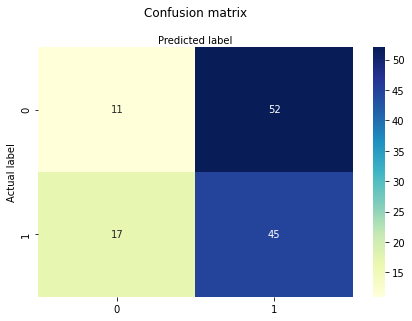

In [98]:
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [91]:
from sklearn.metrics import accuracy_score, \
                            precision_score, recall_score

print(f"Accuracy: {accuracy_score(Y_test, y_pred)}")
print(f"Precision: {precision_score(Y_test, y_pred)}")
print(f"Recall: {recall_score(Y_test, y_pred)}")


Accuracy: 0.448
Precision: 0.4639175257731959
Recall: 0.7258064516129032


Accuracy - What fraction of predictions did our model get right? 
Precision - What proportion of positive identifications were actually correct?
Recall - What proportion of actual positives were identified correctly?

In [92]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.17      0.24        63
           1       0.46      0.73      0.57        62

    accuracy                           0.45       125
   macro avg       0.43      0.45      0.40       125
weighted avg       0.43      0.45      0.40       125



# Lab

### Open Ended Questions:
1. What do you understand by Machine Learning? What does it mean and how does it work?
2. What are the different Algorithms techniques in Machine Learning?
3. What is the difference between supervised and unsupervised machine learning?
4. What is Overfitting in Machine Learning?
5. What is the difference between classification and regression?
6. In what situations would you use a linear regression? What do you need for a linear regression? Briefly explain the process
7. In what situations would you use a logistic regression? What do you need for a logistic regression? Briefly explain the process
8. What is cross validation? Why is it useful?
9. Explain the Bias vs. Variance issue and how it affects our machine learning models.
10. Explain the sklearn method `test_train_split`. Why do we use it?
11. Why do we calculate errors for supervised learning? 
12. What is $R^{2}$ and why do we use it to analyze the fitness of our linear regressions?
13. Explain what the metrics we use to evaluate the performance of our logistic regressions mean (accuracy, precision, recall). What is a confusion matrix and what does it help us understand?
### 